# Matplotlib
Matplotlib documentation: http://matplotlib.org/contents.html

Matploblib은 데이터 시각화를 위한 패키지입니다.

## 0. Basic

Matplotlib은 일반적으로 다음과 같이 사용됩니다.

- 일부 데이터로 그림을 그리는 함수를 호출 (예: plot ())
- 많은 기능을 호출하여 플롯의 속성을 설정 (예: 색상, 점의 모양 등)
- 플롯을 표시 (예: show ())

In [1]:
# matplotlib의 결과물을 notebook에 바로 띄우기 위한 문구
%matplotlib inline

# import packages
# 여기에서는 matplotlib의 submodule인 pyplot을 주로 활용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (4, 4,)
plt.rcParams['font.size'] = 10

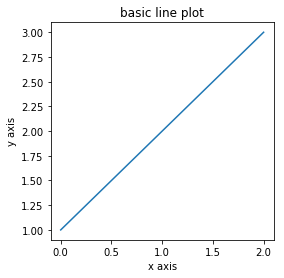

In [3]:
# basic line plot
myarray = np.array([1,2,3])
plt.plot(myarray)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('basic line plot')
plt.show()

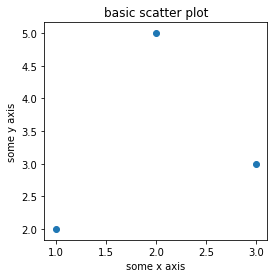

In [4]:
# basic scatter plot
x = np.array([1, 2, 3])
y = np.array([2, 5, 3])
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.title('basic scatter plot')
plt.show()

## 1. Matplotlib + Pandas ==> AWESOME!
Pandas는 Matplotlib과 연동되어 손쉽게 그림을 생성하는 기능을 제공합니다.

### Histogram (히스토그램)
Purpose: Showing the distribution of a numerical variable

In [5]:
# Example data: Drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [6]:
drinks.head(5)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [8]:
drinks['beer']

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer, Length: 193, dtype: int64

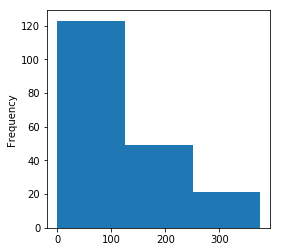

In [9]:
# compare with histogram
drinks['beer'].plot(kind='hist', bins=3)

Text(0.5, 1.0, 'Histogram of Beer Servings')

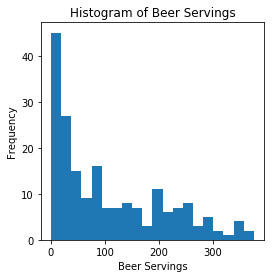

In [10]:
# try more bins
# add title and labels
drinks['beer'].plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.title('Histogram of Beer Servings')

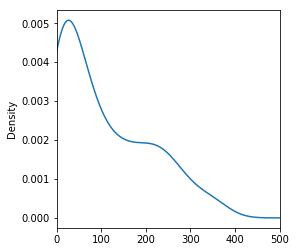

In [11]:
# compare with density plot (smooth version of a histogram)
drinks['beer'].plot(kind='density', xlim=(0, 500))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18d86b70>,
      dtype=object)

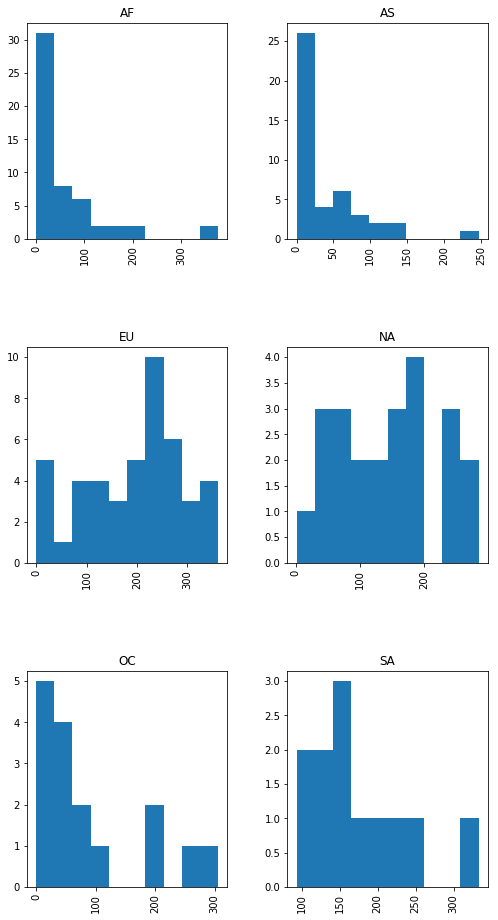

In [12]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent', figsize=(8, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18eff550>,
      dtype=object)

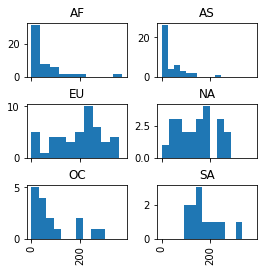

In [13]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170a0c50>,
      dtype=object)

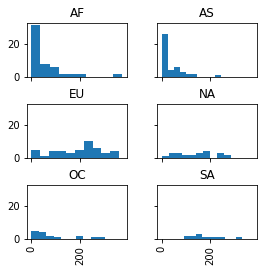

In [14]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1986f8d0>,
      dtype=object)

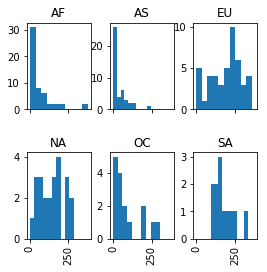

In [15]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

### Scatter plot (산점도)
Purpose: Showing the relationship between two numerical variables

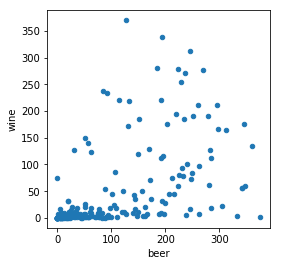

In [16]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

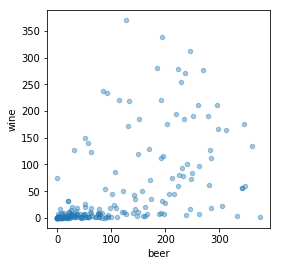

In [17]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.4)

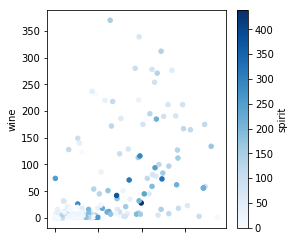

In [18]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19e8a240>,
      dtype=object)

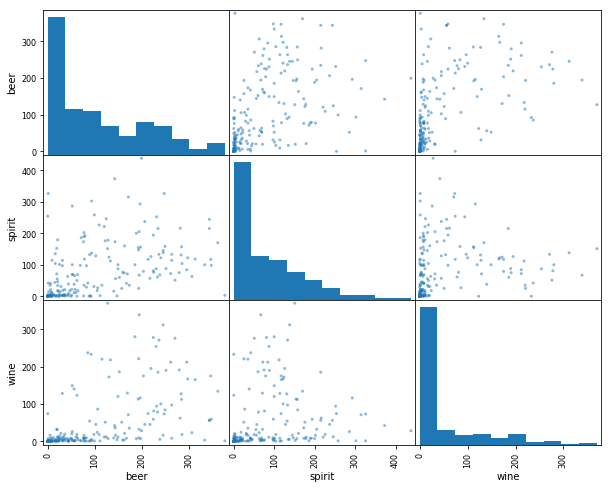

In [19]:
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8))

### Bar plot
Purpose: Showing a numerical comparison across different categories

In [20]:
# count the number of countries in each continent
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

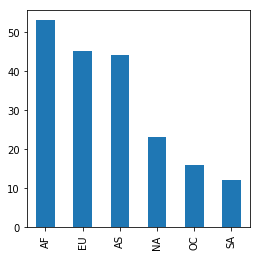

In [21]:
# compare with bar plot
drinks['continent'].value_counts().plot(kind='bar')

In [22]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


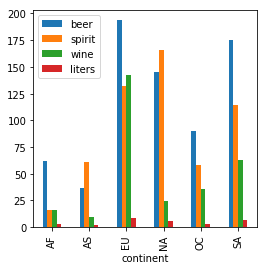

In [23]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

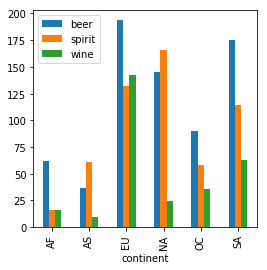

In [24]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

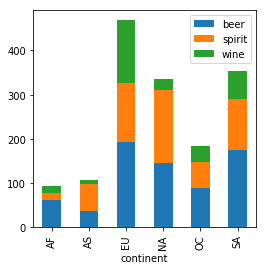

In [25]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

### Box plot
Purpose: Showing quartiles and outliers for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

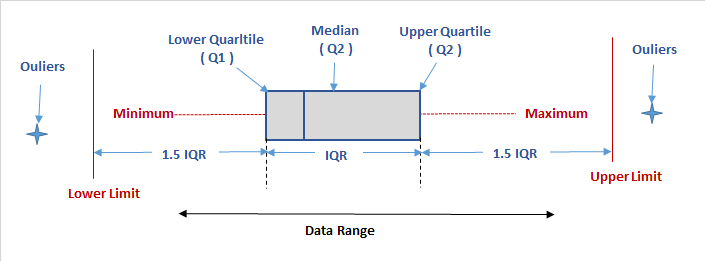

In [26]:
from IPython.display import Image 
Image(filename="Box_plot.png")

In [28]:
# show "five-number summary" for spirit
drinks['spirit'].describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

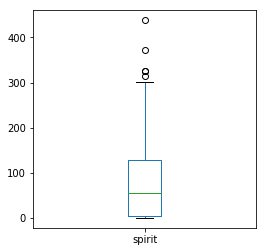

In [29]:
# compare with box plot
drinks['spirit'].plot(kind='box')

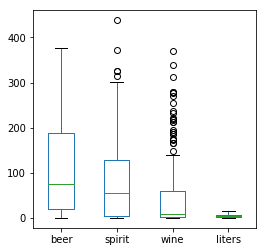

In [30]:
# include multiple variables
drinks.plot(kind='box')

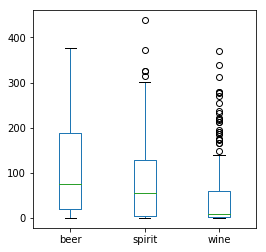

In [31]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')

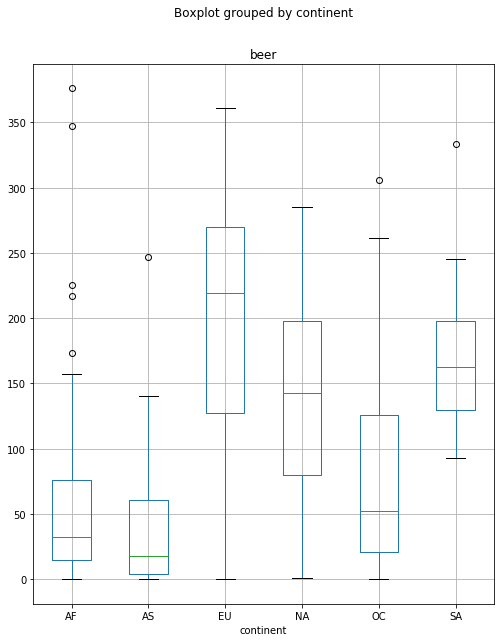

In [32]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent', figsize=(8, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a6e6588>,
      dtype=object)

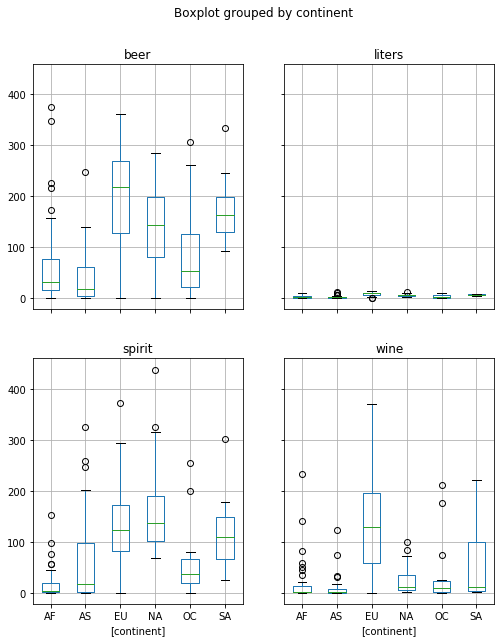

In [33]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent', figsize=(8, 10))

## 2. Saving a plot and Changing a style

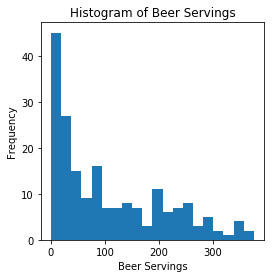

In [34]:
# saving a plot to a file
drinks['beer'].plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_original.png')

In [35]:
# list available plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [36]:
# change to a different style
plt.style.use('ggplot')

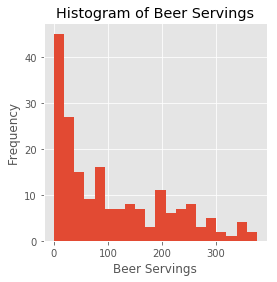

In [37]:
# saving a plot to a file
drinks['beer'].plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_ggplot.png')

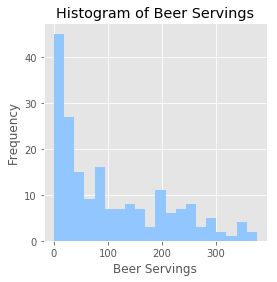

In [38]:
# Other example
plt.style.use('seaborn-pastel')
drinks['beer'].plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_seaborn.png')

## 3. Style

**Marker**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/marker_reference.html
- http://matplotlib.org/api/markers_api.html

**Line**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/line_styles_reference.html
- http://matplotlib.org/api/lines_api.html

**Color**:
- http://matplotlib.org/examples/color/named_colors.html
- http://matplotlib.org/api/colors_api.html


In [39]:
from IPython.display import Image

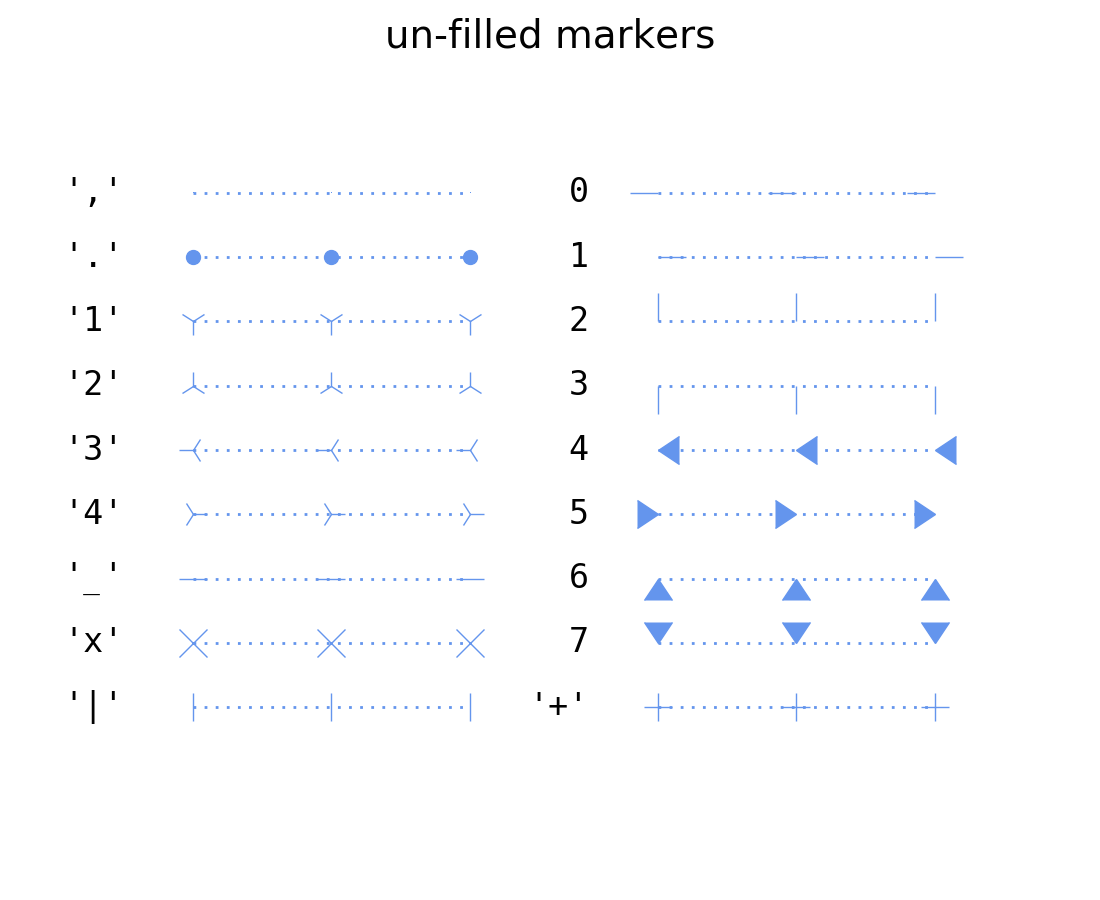

In [40]:
Image(filename="marker_reference_00.png")

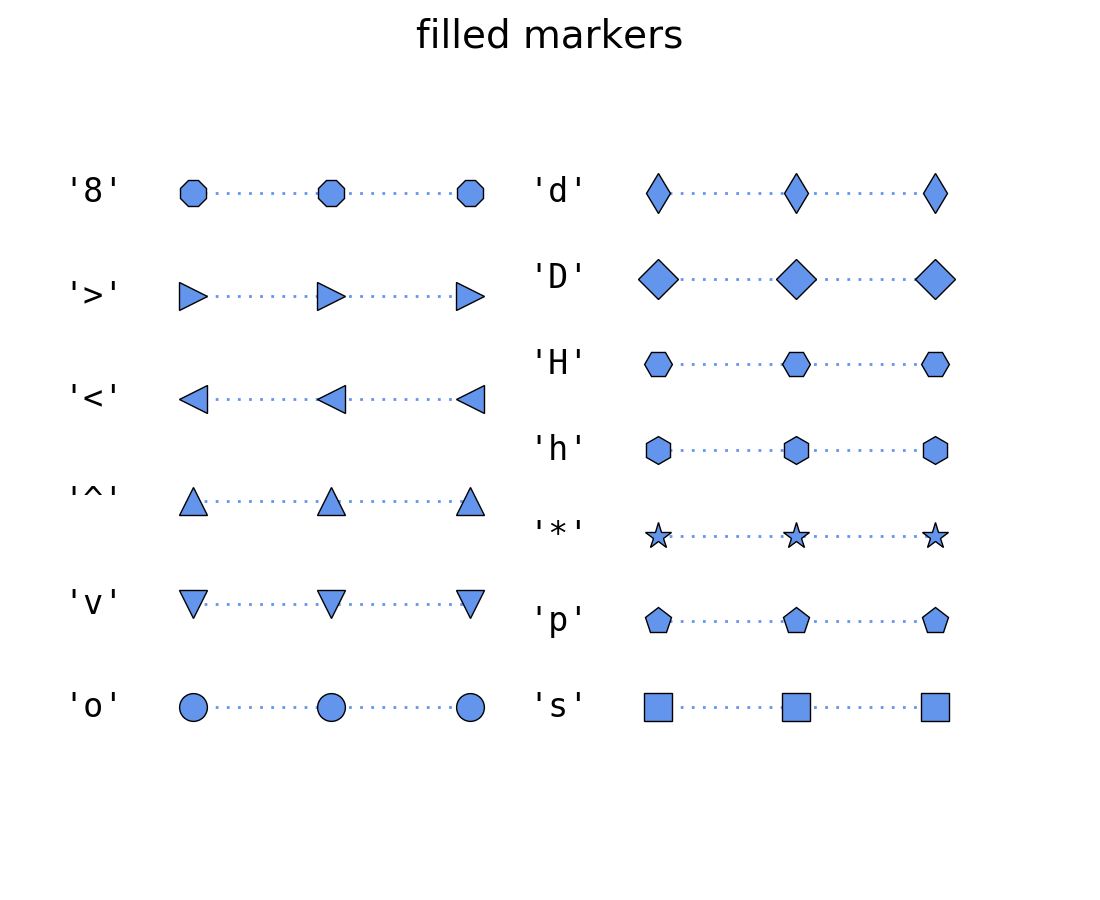

In [41]:
Image(filename="marker_reference_01.png")

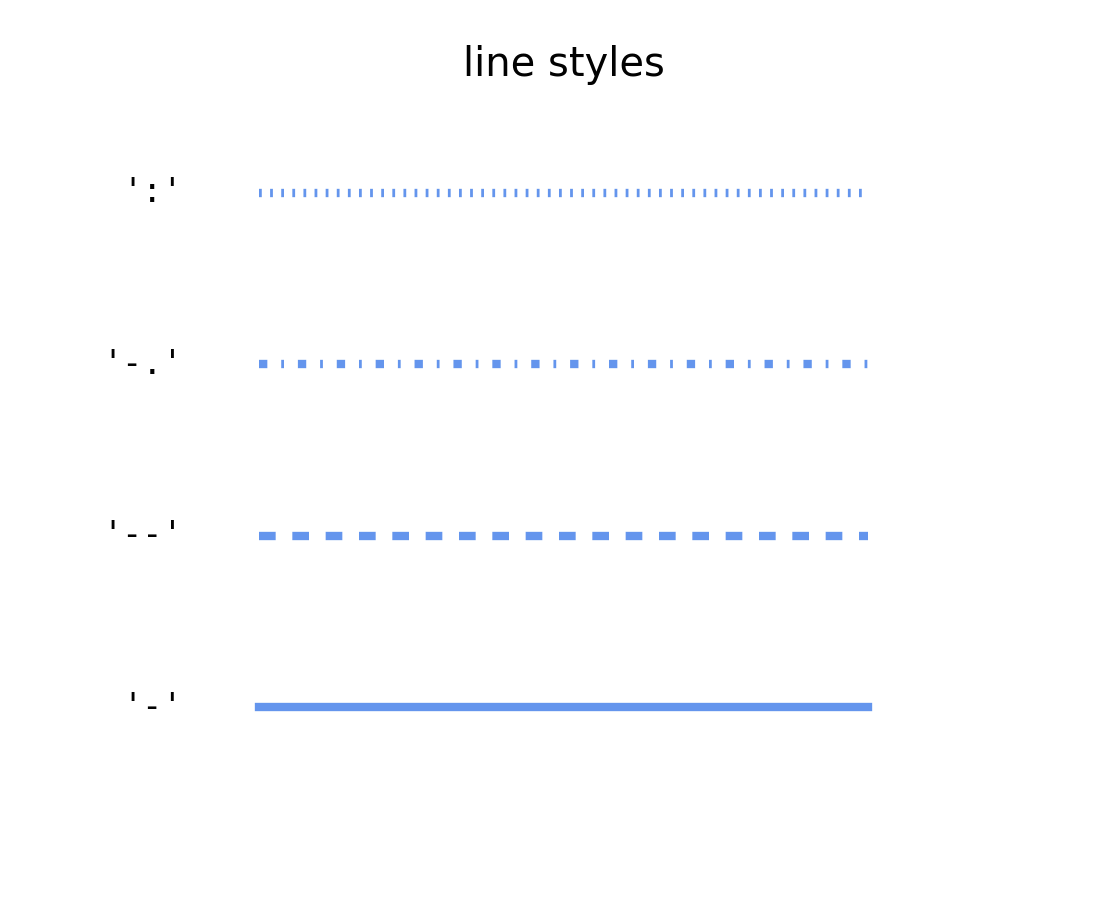

In [42]:
Image(filename="line_styles_reference.png")

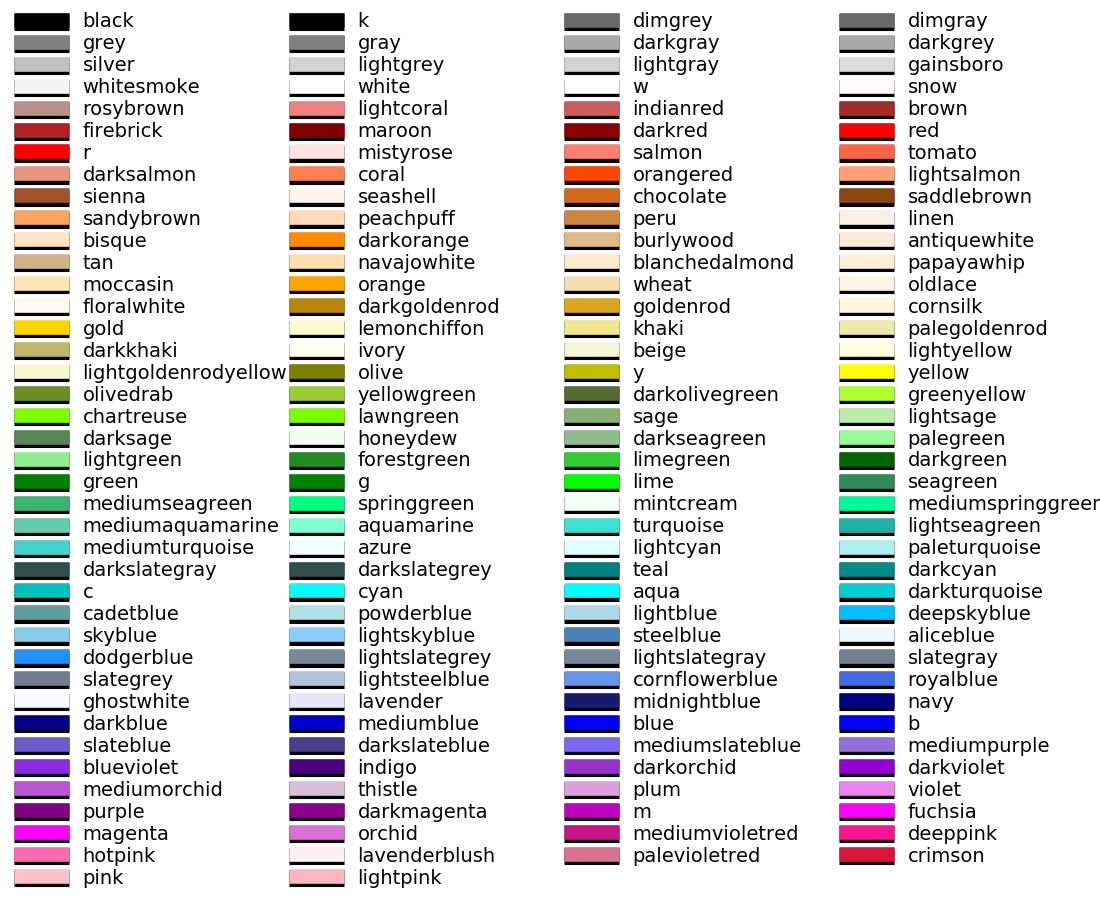

In [43]:
Image(filename="named_colors.png")

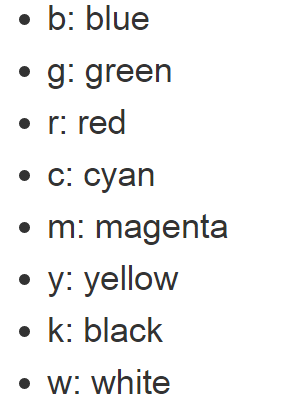

In [44]:
Image(filename="named_colors_brief.png")

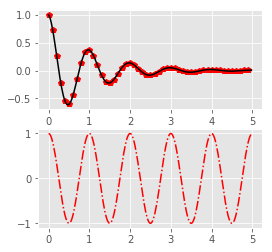

In [47]:
# from http://matplotlib.org/users/pyplot_tutorial.html
# 자유롭게 변형해보면서 그림을 수정해보시오.

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'rp', t2, f(t2), 'k') # 'ro': 빨간색 동그라미, 'k': 검은색

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r-.') # 'r--': 빨간색 점선
plt.show()